# Chapter 1


In [1]:
import numpy as np
from numpy.linalg import inv  # （用于）矩阵求逆
import matplotlib.pyplot as plt
import pandas as pd


## 1.1 Probability, entropy and Kullback-Leibler divergence

PDF: Probability density fuction 概率密度函数


### Project 1.1.1: 非线性回归过拟合


In [2]:
n = 11  # 非线性回归的训练数据对数 (xi, yi)
scale = 0.7  # 11 个训练数据对 (xi, yi) 中添加的噪声幅度


def f(x):
  """function for a smooth curve as a ground Truth
  平滑曲线作为基础真实值的函数"""
  return x**4 + x**2 - 1


x_true = np.linspace(-1.0, 1, 101)  # The ground Truth curve's X
y_true = f(x_true)  # The ground Truth curve's Y=f(x)
# 生成11个训练数据点 (x_train, y_train)，并在训练数据中添加噪声
x_train = np.linspace(-1, 1, n)  # Train data X
y_train = (
  f(x_train)  # Train data Y: noisy curve
  + np.random.uniform(-scale, scale, size=x_train.shape)
)


In [3]:
# Cell 02: A function for calculations of y_hat (mu) and Weights
def y_hat(x, y, m):  # m: the order of a univariate polynomial (Eq.1.1.22)
  """计算多项式回归的预测值 mu 和权重 W"""
  ones = np.ones(len(x))  # ones=[l,l,...,1], len(ones) = n = 11
  for i in range(1, m + 1):
    ones = np.vstack((ones, x**i))
  X = ones.T
  W = inv(X.T @ X) @ (X.T @ y)  # Eq.1.1.24
  mu = X @ W  # Eq.1.1.22
  return mu, W


Y3hat, W3 = y_hat(x_train, y_train, 3)
Y9hat, W9 = y_hat(x_train, y_train, 9)

#### 求 W 的最小二乘公式

在给定的代码中，`W = inv(X.T @ X) @ (X.T @ y)` 是用于计算多项式回归权重 `W` 的最小二乘公式。具体解释如下：

1. **设计矩阵 $X$**：

   - 设计矩阵 $ X $ 是一个 $ n \times (m+1) $ 的矩阵，其中 $ n $ 是样本数量（在这个例子中为 11），$ m $ 是多项式的阶数。
   - 每一列代表 $ x $ 的不同幂次项，从 $ x^0 $ 到 $ x^m $。

2. **目标**：

   - 我们希望找到一个权重向量 $ W $，使得预测值 $ \hat{y} = XW $ 尽可能接近真实值 $ y $。

3. **最小二乘法**：

   - 最小二乘法的目标是最小化残差平方和 $ E(W) = \| y - XW \|^2 $。
   - 为了找到最优的 $ W $，我们对 $ E(W) $ 关于 $ W $ 求导，并令导数等于零，得到正规方程 $ X^T X W = X^T y $。

4. **解正规方程**：

   - 通过求解正规方程 $ W = (X^T X)^{-1} X^T y $，可以得到权重 $ W $。
   - 其中 $ X^T $ 表示 $ X $ 的转置矩阵，$ (X^T X)^{-1} $ 表示 $ X^T X $ 的逆矩阵。

5. **代码实现**：
   - `X.T @ X` 计算设计矩阵 $ X $ 的转置与自身相乘的结果。
   - `inv(X.T @ X)` 对上述结果求逆。
   - `(X.T @ y)` 计算设计矩阵 $ X $ 的转置与目标向量 $ y $ 相乘的结果。
   - 最终，`inv(X.T @ X) @ (X.T @ y)` 得到权重向量 $ W $。


0.16618837009970713
0.020680232724377214


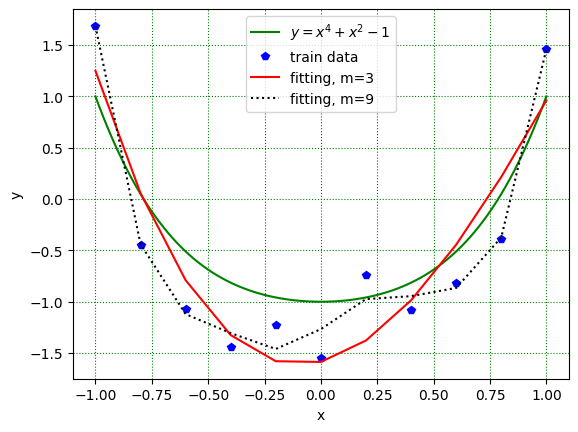

In [4]:
# Cell 03: Showing regression results
fig, ax = plt.subplots()
ax.plot(x_true, y_true, "g-", label="$y=x^4+x^2-1$")
ax.plot(x_train, y_train, "bp", label="train data")
ax.plot(x_train, Y3hat, "r-", label="fitting, m=3")
ax.plot(x_train, Y9hat, "k:", label="fitting, m=9")
ax.set(xlabel="x", ylabel="y")
ax.grid(color="g", linestyle=":")
ax.legend()
print(((Y3hat - y_train) ** 2).mean())  # beta3=0.1247
print(((Y9hat - y_train) ** 2).mean())  # beta9=0.0012
# -----------------------------------------------------------------The End

### Project 1.1.2: 期望最大化算法的应用 (Application of Expectation-Maximization Algorithm)


In [5]:
# Cell 06: Data Generated by 3 Gaussians for Expectation-maximization fitting
#          生成了由三个高斯分布模拟的真实概率密度函数的数据，并将其保存为CSV文件
def make_teachers_data():
  n_samples = 100
  u1, s1 = -6, 1.5  # u: mean; s: sigma for 3 Normal distributions to generate data
  u2, s2 = 0, 1.2
  u3, s3 = 5, 2
  x1 = list(np.random.normal(loc=u1, scale=s1, size=n_samples))  # len(x1)=100
  x2 = list(np.random.normal(loc=u2, scale=s2, size=n_samples))  # len(x2)=100
  x3 = list(np.random.normal(loc=u3, scale=s3, size=n_samples))  # len(x3)=100
  X = np.array(x1 + x2 + x3)  # len(X)=300, concatenation of x1, x2 and x3
  my_DF = pd.DataFrame({"X": X})
  my_DF.to_csv("./TeachersData.csv", index=False)


make_teachers_data()

In [6]:
# 数据可由上面的 Cell 6 代码生成
X = np.loadtxt("./TeachersData.csv", skiprows=1, delimiter=",")  # input data
n_samples = X.size
assert n_samples == 300

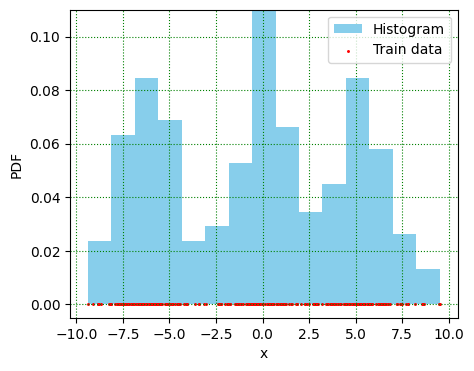

In [7]:
# Cell 02: Data visualization with a histogram
fig, ax = plt.subplots(figsize=(5, 4))
ax.hist(X, bins=15, density=True, color="skyblue", label="Histogram")
ax.scatter(X, [0] * len(X), s=5, c="r", marker=".", label="Train data")
ax.set(xlabel="x", ylabel="PDF", ylim=[-0.005, 0.11])
ax.legend()
ax.grid(which="major", axis="both", color="g", linestyle=":")
plt.show()

In [8]:
# Cell 03: Set parameters of 3 Gaussians to simulate the True PDF
k = 3  # Using 3 Gaussian distributions to simulate a true PDF
u = np.array([-5.5, 0, 3.5])  # 均值 3 means by guess
variances = np.ones((k))  # 3 variances by guess: [1. 1. 1.]
s = variances**0.5  # 3 standard deviations: [1. 1. 1.]
pz = np.array([1 / 3, 1 / 3, 1 / 3])  # 高斯分布的混合权重 marginal possibility P(Z)=[l/3, 1/3, 1/3]


def pdf(x, u, s):  # Gaussian distribution PDF
  """高斯分布的概率密度函数"""
  pi = np.pi
  return (1 / (2 * pi * s**2) ** 0.5) * np.exp(-0.5 * ((x - u) / s) ** 2)


bins = np.linspace(np.min(X), np.max(X), n_samples)


In [9]:
# Cell 04: Fitting with Expectation-maximization algorithm---------------------Cell 04
n_epochs = 5000
for step in range(n_epochs):
  likelihood = np.empty((k, len(X)))  # likelihood p(xj|zi) for Table 1.5
  for i in range(k):
    likelihood[i] = pdf(X, u[i], s[i])  # p(xj|zi), i=l,2,3, j=l,2,..,n
  px = np.sum(  # px: marginal possibility: px=[p(xl), p(x2),...,p(xn)]
    [likelihood[i] * pz[i] for i in range(k)], axis=0
  )
  b = np.empty((k, len(X)))
  for i in range(k):  # posterior possibility b for p(zi|xj) for Table 1.6
    p_xj_zi = likelihood[i] * pz[i]  # p(xj, zi)=p(xj|zi)p(zi),
    b[i] = p_xj_zi / px  # p(zi|xj)=p(xj, zi)/p(xj)
    # update mean and variance
    u[i] = np.sum(b[i] * X) / (np.sum(b[i]) + 1e-7)  # ---------------- Eq.1.31
    variances[i] = np.sum(b[i] * np.square(X - u[i])) / (np.sum(b[i]) + 1e-7)
    s[i] = variances[i] ** 0.5  # ----------------------------Eq.1.32
    # update the weights
    pz[i] = np.mean(b[i])  # ----------------------------Eq.1.30


original means= -6 0 5
fitting means= [-6.14851431 -0.112664    5.28128612]
original sigmas= 1.5 1.2 2
fitting sigms= [1.44158293 1.14562485 1.71983227]


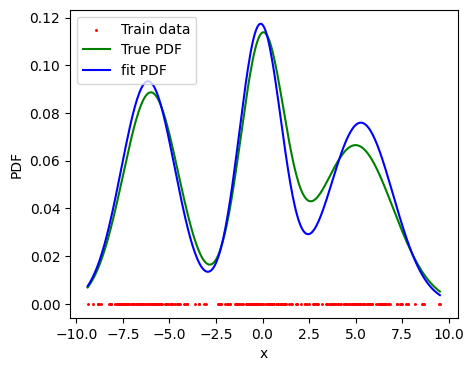

In [10]:
# Cell 05: Show fitting results
fig, ax = plt.subplots(figsize=(5, 4))
y = pdf(bins, -6, 1.5) / 3 + pdf(bins, 0, 1.2) / 3 + pdf(bins, 5, 2) / 3  # —Ground Truth
ax.set(xlabel="x", ylabel="PDF")
ax.scatter(X, [0] * len(X), s=5, c="r", marker=".", label="Train data")
ax.plot(bins, y, color="g", label="True PDF")
plt.plot(
  bins,
  pz[0] * pdf(bins, u[0], s[0]) + pz[1] * pdf(bins, u[1], s[1]) + pz[2] * pdf(bins, u[2], s[2]),
  "b",
  label="fit PDF",
)
plt.legend(loc="upper left")
print("original means=", -6, 0, 5)
print("fitting means=", u)
print("original sigmas=", 1.5, 1.2, 2)
print("fitting sigms=", s)


## 1.2 Using a gradient descent algorithm for linear regression
